# Task 1. The following describes the dataset variables:

* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per \$10,000
* PTRATIO - pupil-teacher ratio by town
* LSTAT - % lower status of the population
* MEDV - Median value of owner-occupied homes in \$1000's


## Task 3: Load in the Dataset in your Jupyter Notebook

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

## Task 4. Generate Descriptive Statistics and Visualizations
For all visualizations, please include a title in each graph and appropriate labels. Generate the following and explain your findings:
* For the "Median value of owner-occupied homes" provide a boxplot
* Provide a  bar plot for the Charles river variable
* Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
* Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?
* Create a histogram for the pupil to teacher ratio variable

### For the "Median value of owner-occupied homes" provide a boxplot

<Axes: ylabel='MEDV'>

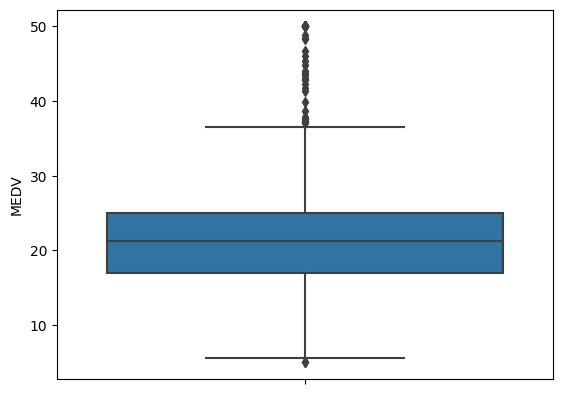

In [5]:
sns.boxplot(y='MEDV', data = boston_df)

### Provide a bar plot for the Charles river variable

<Axes: xlabel='CHAS', ylabel='count'>

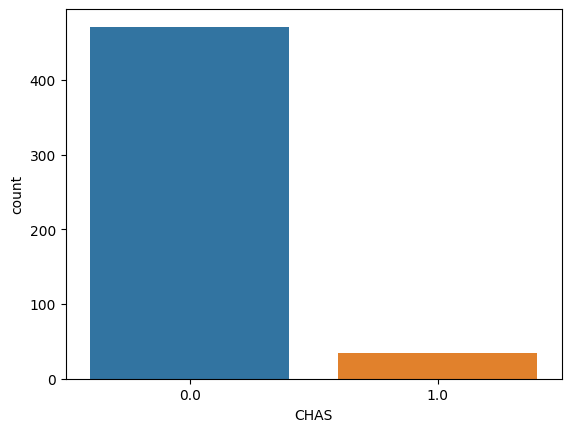

In [30]:
sns.countplot(x = 'CHAS', data = boston_df)

### Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

<Axes: xlabel='age_group', ylabel='MEDV'>

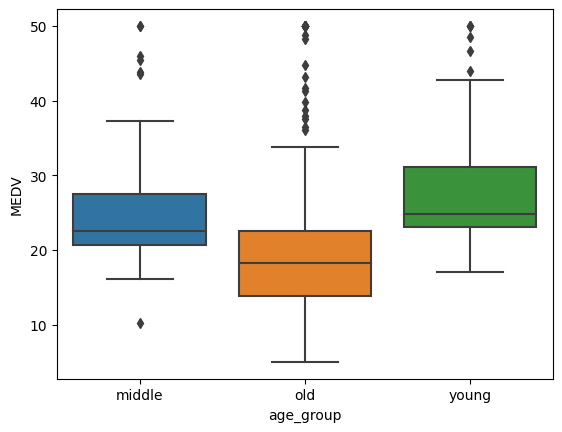

In [27]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = 'young'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE']<70), 'age_group'] = 'middle'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = 'old'

sns.boxplot(x = 'age_group', y = 'MEDV', data = boston_df)

Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

<Axes: xlabel='INDUS', ylabel='NOX'>

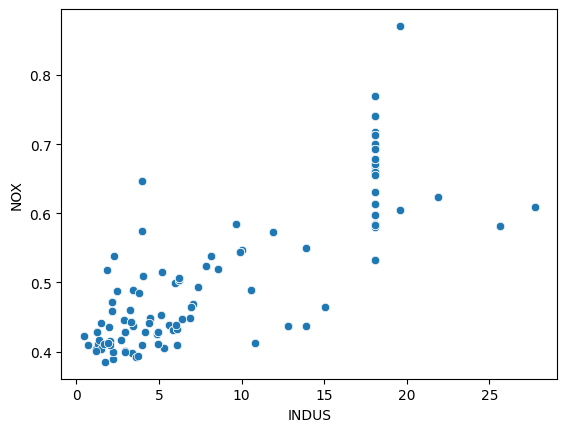

In [29]:
sns.scatterplot(x='INDUS', y='NOX', data=boston_df)

### Create a histogram for the pupil to teacher ratio variable

<ipython-input-37-bf6f8cfad6a1>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(boston_df['PTRATIO'], bins = 8, kde=True)


<Axes: xlabel='PTRATIO', ylabel='Density'>

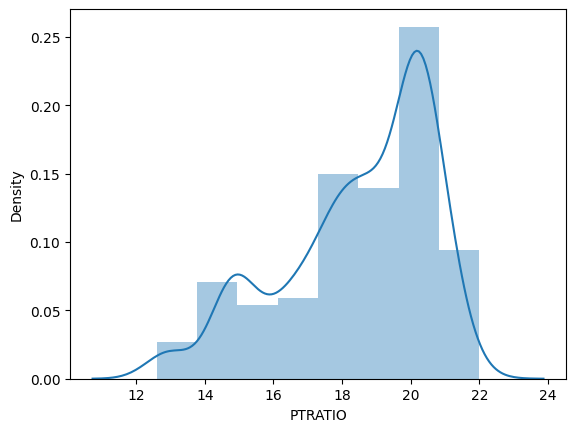

In [37]:
sns.distplot(boston_df['PTRATIO'], bins = 8, kde=True)

## Task 5: Use the appropriate tests to answer the questions provided.

For each of the following questions:
* Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
* Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
* Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
* What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Be sure to:
State your hypothesis.
Use α = 0.05

Perform the test Statistics.

State the conclusion from the test.

In [4]:
import scipy.stats

### Is there a significant difference in median value of houses bounded by the Charles river or not?

In [43]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                      boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var = True)

TtestResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

Since the p-value less than 0.05 we reject null hypothesis as there is evidence of an association median value of houses bounded by the Charles river or not.

### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)?

In [51]:
age_yng = boston_df[boston_df['age_group'] == 'young']['MEDV']
age_mdl = boston_df[boston_df['age_group'] == 'middle']['MEDV']
age_old = boston_df[boston_df['age_group'] == 'old']['MEDV']

f_statistic, p_value = scipy.stats.f_oneway(age_yng, age_mdl, age_old)

print(f'statistic = {f_statistic}, pvalue = {p_value}')

statistic = 36.40764999196599, pvalue = 1.7105011022702984e-15


Since the p-value less than 0.05 we reject null hypothesis as there is evidence of that at least one of the means differ.

### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?

In [5]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209151, pvalue=7.913361061239527e-98)

Since the p=value less than 0.05 we reject null hyphothesis as there is evidence of relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

### What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes?

In [6]:
import statsmodels.api as sm

In [7]:
X = boston_df['DIS']
y = boston_df['MEDV']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 17 Oct 2023   Prob (F-statistic):           1.21e-08
Time:                        07:48:50   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We reject null hyphothesis. Impact R-squared: 0.062